/var/folders/q7/54zdqqsd2k97cjf5y4lqxf_00000gn/T/ipykernel_53357/1317300899.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)


Epoch 1/50


2024-08-07 13:33:32.322659: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


30/30 [==============================] - 4s 61ms/step - loss: 0.7009 - accuracy: 0.4879 - val_loss: 0.6920 - val_accuracy: 0.5359
Epoch 2/50
30/30 [==============================] - 0s 17ms/step - loss: 0.6941 - accuracy: 0.5037 - val_loss: 0.6930 - val_accuracy: 0.5148
Epoch 3/50
30/30 [==============================] - 0s 16ms/step - loss: 0.6957 - accuracy: 0.4942 - val_loss: 0.6923 - val_accuracy: 0.5148
Epoch 4/50
30/30 [==============================] - 0s 16ms/step - loss: 0.6935 - accuracy: 0.5290 - val_loss: 0.6926 - val_accuracy: 0.5021
Epoch 5/50
30/30 [==============================] - 0s 16ms/step - loss: 0.6953 - accuracy: 0.5364 - val_loss: 0.6932 - val_accuracy: 0.5021
Epoch 6/50
30/30 [==============================] - 0s 16ms/step - loss: 0.6940 - accuracy: 0.5195 - val_loss: 0.6930 - val_accuracy: 0.4852
Epoch 7/50
30/30 [==============================] - 0s 16ms/step - loss: 0.6970 - accuracy: 0.4910 - val_loss: 0.6927 - val_accuracy: 0.5148
Epoch 8/50
30/30 [======

/var/folders/q7/54zdqqsd2k97cjf5y4lqxf_00000gn/T/ipykernel_53357/1317300899.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.scatter(data.index[buy_signals], data['Close'][buy_signals], marker='^', color='g', label='Buy Signal', alpha=1)
/var/folders/q7/54zdqqsd2k97cjf5y4lqxf_00000gn/T/ipykernel_53357/1317300899.py:76: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.scatter(data.index[sell_signals], data['Close'][sell_signals], marker='v', color='r', label='Sell Signal', alpha=1)


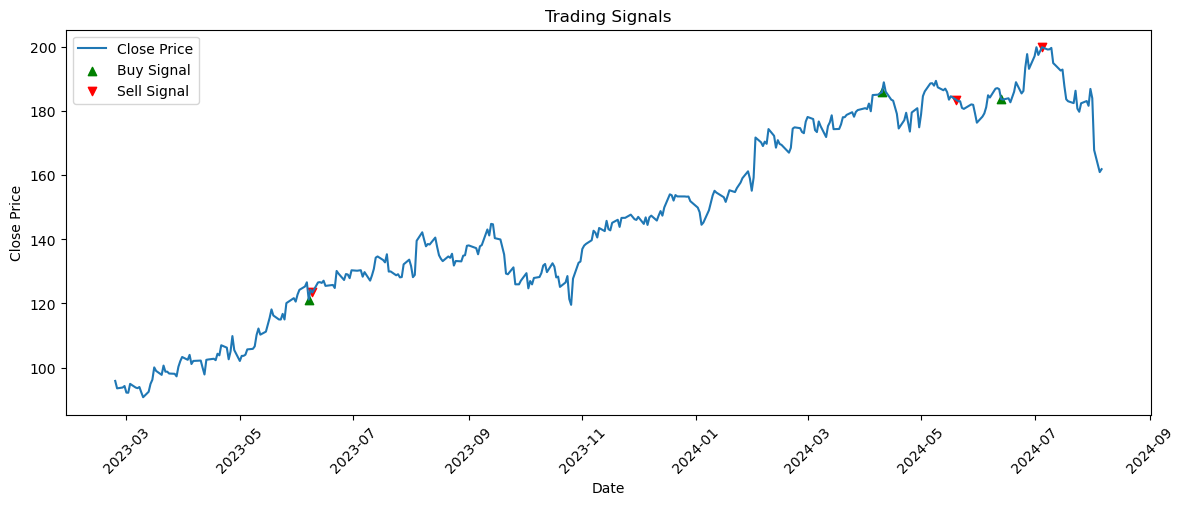

Trading Log:
(Timestamp('2023-06-07 00:00:00-0400', tz='America/New_York'), 'Buy', 100, 121.2300033569336)
(Timestamp('2023-06-09 00:00:00-0400', tz='America/New_York'), 'Sell', 100, 123.43000030517578)
(Timestamp('2024-04-10 00:00:00-0400', tz='America/New_York'), 'Buy', 100, 185.9499969482422)
(Timestamp('2024-05-20 00:00:00-0400', tz='America/New_York'), 'Sell', 100, 183.5399932861328)
(Timestamp('2024-06-13 00:00:00-0400', tz='America/New_York'), 'Buy', 100, 183.8300018310547)
(Timestamp('2024-07-05 00:00:00-0400', tz='America/New_York'), 'Sell', 100, 200.0)
Final Balance: 101595.99914550781
Total Profit: 1595.9991455078125


/var/folders/q7/54zdqqsd2k97cjf5y4lqxf_00000gn/T/ipykernel_53357/1317300899.py:107: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if balance >= 100 * data['Close'][i]:
/var/folders/q7/54zdqqsd2k97cjf5y4lqxf_00000gn/T/ipykernel_53357/1317300899.py:109: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  balance -= 100 * data['Close'][i]
/var/folders/q7/54zdqqsd2k97cjf5y4lqxf_00000gn/T/ipykernel_53357/1317300899.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positi

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import datetime

# 获取股票数据
def get_stock_data(stock_code):
    stock = yf.Ticker(stock_code)
    data = stock.history(period='5y')
    return data

# 计算技术指标
def add_technical_indicators(data):
    data['MA5'] = data['Close'].rolling(window=5).mean()
    data['MA10'] = data['Close'].rolling(window=10).mean()
    data['RSI'] = compute_rsi(data['Close'], 14)
    data['MACD'], data['MACD_signal'] = compute_macd(data['Close'])
    data = data.dropna()
    return data

# 计算相对强弱指数（RSI）
def compute_rsi(series, period):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# 计算移动平均线收敛/发散指标（MACD）
def compute_macd(series, short_window=12, long_window=26, signal_window=9):
    short_ema = series.ewm(span=short_window, adjust=False).mean()
    long_ema = series.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

# 预处理数据
def preprocess_data(data):
    data = add_technical_indicators(data)
    data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)
    data = data.dropna()
    features = data[['Open', 'High', 'Low', 'Close', 'MA5', 'MA10', 'RSI', 'MACD', 'MACD_signal']]
    target = data['Target']
    return features, target, data

# 创建Transformer模型
def create_transformer_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LayerNormalization()(inputs)
    x = MultiHeadAttention(num_heads=4, key_dim=4)(x, x)
    x = GlobalAveragePooling1D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 绘制交易信号
def plot_signals(data, buy_signals, sell_signals):
    fig, ax = plt.subplots(figsize=(14, 5))
    ax.plot(data.index, data['Close'], label='Close Price')
    
    ax.scatter(data.index[buy_signals], data['Close'][buy_signals], marker='^', color='g', label='Buy Signal', alpha=1)
    ax.scatter(data.index[sell_signals], data['Close'][sell_signals], marker='v', color='r', label='Sell Signal', alpha=1)
    
    ax.set_title('Trading Signals')
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price')
    ax.legend()
    plt.xticks(rotation=45)
    plt.show()

# 生成交易信号
def generate_signals(predictions):
    buy_signals = []
    sell_signals = []
    
    for i in range(1, len(predictions)):
        if predictions[i] > 0.5 and predictions[i-1] <= 0.5:
            buy_signals.append(i)
        elif predictions[i] <= 0.5 and predictions[i-1] > 0.5:
            sell_signals.append(i)
    
    return buy_signals, sell_signals

# 模拟交易
def simulate_trading(data, buy_signals, sell_signals):
    initial_balance = 100000  # Initial balance
    balance = initial_balance
    shares = 0
    trade_log = []

    for i in range(len(data)):
        if i in buy_signals:
            if balance >= 100 * data['Close'][i]:
                shares += 100
                balance -= 100 * data['Close'][i]
                trade_log.append((data.index[i], 'Buy', 100, data['Close'][i]))
        elif i in sell_signals:
            if shares >= 100:
                shares -= 100
                balance += 100 * data['Close'][i]
                trade_log.append((data.index[i], 'Sell', 100, data['Close'][i]))

    # Calculate final balance
    final_balance = balance + shares * data['Close'].iloc[-1]
    profit = final_balance - initial_balance
    return trade_log, final_balance, profit

def main():
    stock_code = 'AMZN'
    data = get_stock_data(stock_code)
    features, target, full_data = preprocess_data(data)

    # Standardize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_features = scaler.fit_transform(features)

    # Create time-step data
    def create_dataset(data, time_step=1):
        x, y = [], []
        for i in range(len(data)-time_step-1):
            a = data[i:(i+time_step), :]
            x.append(a)
            y.append(target.values[i + time_step])
        return np.array(x), np.array(y)

    time_step = 60
    x, y = create_dataset(scaled_features, time_step)

    # Split training and testing data
    train_size = int(len(x) * 0.8)
    x_train, x_test = x[0:train_size], x[train_size:]
    y_train, y_test = y[0:train_size], y[train_size:]

    # Create Transformer model
    model = create_transformer_model((time_step, x.shape[2]))

    # Set up TensorBoard
    log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

    # Train the model
    model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=1, callbacks=[tensorboard_callback])

    # Predict using the last one year's data
    recent_data = full_data.iloc[-(365+time_step):]  # Use the last one year's data
    recent_features = scaled_features[-(365+time_step):]
    x_recent, _ = create_dataset(recent_features, time_step)
    recent_predictions = model.predict(x_recent)
    recent_predictions = np.where(recent_predictions > 0.5, 1, 0).flatten()

    # Generate and plot trading signals
    buy_signals, sell_signals = generate_signals(recent_predictions)
    plot_signals(recent_data.iloc[time_step:], buy_signals, sell_signals)

    # Simulate trading
    trade_log, final_balance, profit = simulate_trading(recent_data.iloc[time_step:], buy_signals, sell_signals)

    # Print trading log and profit
    print("Trading Log:")
    for log in trade_log:
        print(log)
    print(f"Final Balance: {final_balance}")
    print(f"Total Profit: {profit}")

if __name__ == '__main__':
    main()

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# 获取股票数据
def get_stock_data(stock_code):
    stock = yf.Ticker(stock_code)
    data = stock.history(period='5y')
    return data

# 计算技术指标
def add_technical_indicators(data):
    data['MA5'] = data['Close'].rolling(window=5).mean()
    data['MA10'] = data['Close'].rolling(window=10).mean()
    data['RSI'] = compute_rsi(data['Close'], 14)
    data['MACD'], data['MACD_signal'] = compute_macd(data['Close'])
    data = data.dropna()
    return data

# 计算相对强弱指数（RSI）
def compute_rsi(series, period):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# 计算移动平均线收敛/发散指标（MACD）
def compute_macd(series, short_window=12, long_window=26, signal_window=9):
    short_ema = series.ewm(span=short_window, adjust=False).mean()
    long_ema = series.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

# 预处理数据
def preprocess_data(data):
    data = add_technical_indicators(data)
    data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)
    data = data.dropna()
    features = data[['Open', 'High', 'Low', 'Close', 'MA5', 'MA10', 'RSI', 'MACD', 'MACD_signal']]
    target = data['Target']
    return features, target, data

# 创建Transformer模型
def create_transformer_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LayerNormalization()(inputs)
    x, _ = MultiHeadAttention(num_heads=2, key_dim=2)(x, x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 绘制交易信号
def plot_signals(data, buy_signals, sell_signals):
    fig, ax = plt.subplots(figsize=(14, 5))
    ax.plot(data.index, data['Close'], label='Close Price')
    
    ax.scatter(data.index[buy_signals], data['Close'][buy_signals], marker='^', color='g', label='Buy Signal', alpha=1)
    ax.scatter(data.index[sell_signals], data['Close'][sell_signals], marker='v', color='r', label='Sell Signal', alpha=1)
    
    ax.set_title('Trading Signals')
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price')
    ax.legend()
    plt.xticks(rotation=45)
    plt.show()

# 生成交易信号
def generate_signals(predictions):
    buy_signals = []
    sell_signals = []
    
    for i in range(1, len(predictions)):
        if predictions[i] > 0.5 and predictions[i-1] <= 0.5:
            buy_signals.append(i)
        elif predictions[i] <= 0.5 and predictions[i-1] > 0.5:
            sell_signals.append(i)
    
    return buy_signals, sell_signals

# 模拟交易
def simulate_trading(data, buy_signals, sell_signals):
    initial_balance = 100000  # Initial balance
    balance = initial_balance
    shares = 0
    trade_log = []

    for i in range(len(data)):
        if i in buy_signals:
            if balance >= 100 * data['Close'][i]:
                shares += 100
                balance -= 100 * data['Close'][i]
                trade_log.append((data.index[i], 'Buy', 100, data['Close'][i]))
        elif i in sell_signals:
            if shares >= 100:
                shares -= 100
                balance += 100 * data['Close'][i]
                trade_log.append((data.index[i], 'Sell', 100, data['Close'][i]))

    # Calculate final balance
    final_balance = balance + shares * data['Close'].iloc[-1]
    profit = final_balance - initial_balance
    return trade_log, final_balance, profit

def main():
    stock_code = 'AMZN'
    data = get_stock_data(stock_code)
    features, target, full_data = preprocess_data(data)

    # Standardize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_features = scaler.fit_transform(features)

    # Create time-step data
    def create_dataset(data, time_step=1):
        x, y = [], []
        for i in range(len(data)-time_step-1):
            a = data[i:(i+time_step), :]
            x.append(a)
            y.append(target.values[i + time_step])
        return np.array(x), np.array(y)

    time_step = 60
    x, y = create_dataset(scaled_features, time_step)

    # Split training and testing data
    train_size = int(len(x) * 0.8)
    x_train, x_test = x[0:train_size], x[train_size:]
    y_train, y_test = y[0:train_size], y[train_size:]

    # Create Transformer model
    model = create_transformer_model((time_step, x.shape[2]))
    model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test), verbose=1)

    # Predict using the last one year's data
    recent_data = full_data.iloc[-(365+time_step):]  # Use the last one year's data
    recent_features = scaled_features[-(365+time_step):]
    x_recent, _ = create_dataset(recent_features, time_step)
    recent_predictions = model.predict(x_recent)
    recent_predictions = np.where(recent_predictions > 0.5, 1, 0).flatten()

    # Generate and plot trading signals
    buy_signals, sell_signals = generate_signals(recent_predictions)
    plot_signals(recent_data.iloc[time_step:], buy_signals, sell_signals)

    # Simulate trading
    trade_log, final_balance, profit = simulate_trading(recent_data.iloc[time_step:], buy_signals, sell_signals)

    # Print trading log and profit
    print("Trading Log:")
    for log in trade_log:
        print(log)
    print(f"Final Balance: {final_balance}")
    print(f"Total Profit: {profit}")

if __name__ == '__main__':
    main()

/var/folders/q7/54zdqqsd2k97cjf5y4lqxf_00000gn/T/ipykernel_9971/2644746824.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)


TypeError: Cannot iterate over a Tensor with unknown first dimension.